### 머신러닝 맛보기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc
import platform

In [3]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

#### 예시1 - 생선 분류하기 : 도미와 빙어 분류하기 (도미찾기)
- 생선을 자동으로 찾아주는 머신러닝 만들기

In [4]:
# 생선을 분류하기 위해 필요한 특징이 될 데이터 확인하기
    # - 특징을 알면 쉽게 분류 할 수 있음
    # - 생선은 무게와 길이 데이터를 최초에 수집해 놓고 있음

In [45]:
# 데이터 가지고 오기

# 1. 도미 데이터
# 도미 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]
# 도미 무게
brean_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

print('도미 길이 :', bream_length)
print('-------------------------------------------------------------------------------------------------------------------------')
print('도미 무게 :', brean_weight)
print()
print(len(bream_length), len(brean_weight))

도미 길이 : [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
-------------------------------------------------------------------------------------------------------------------------
도미 무게 : [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

35 35


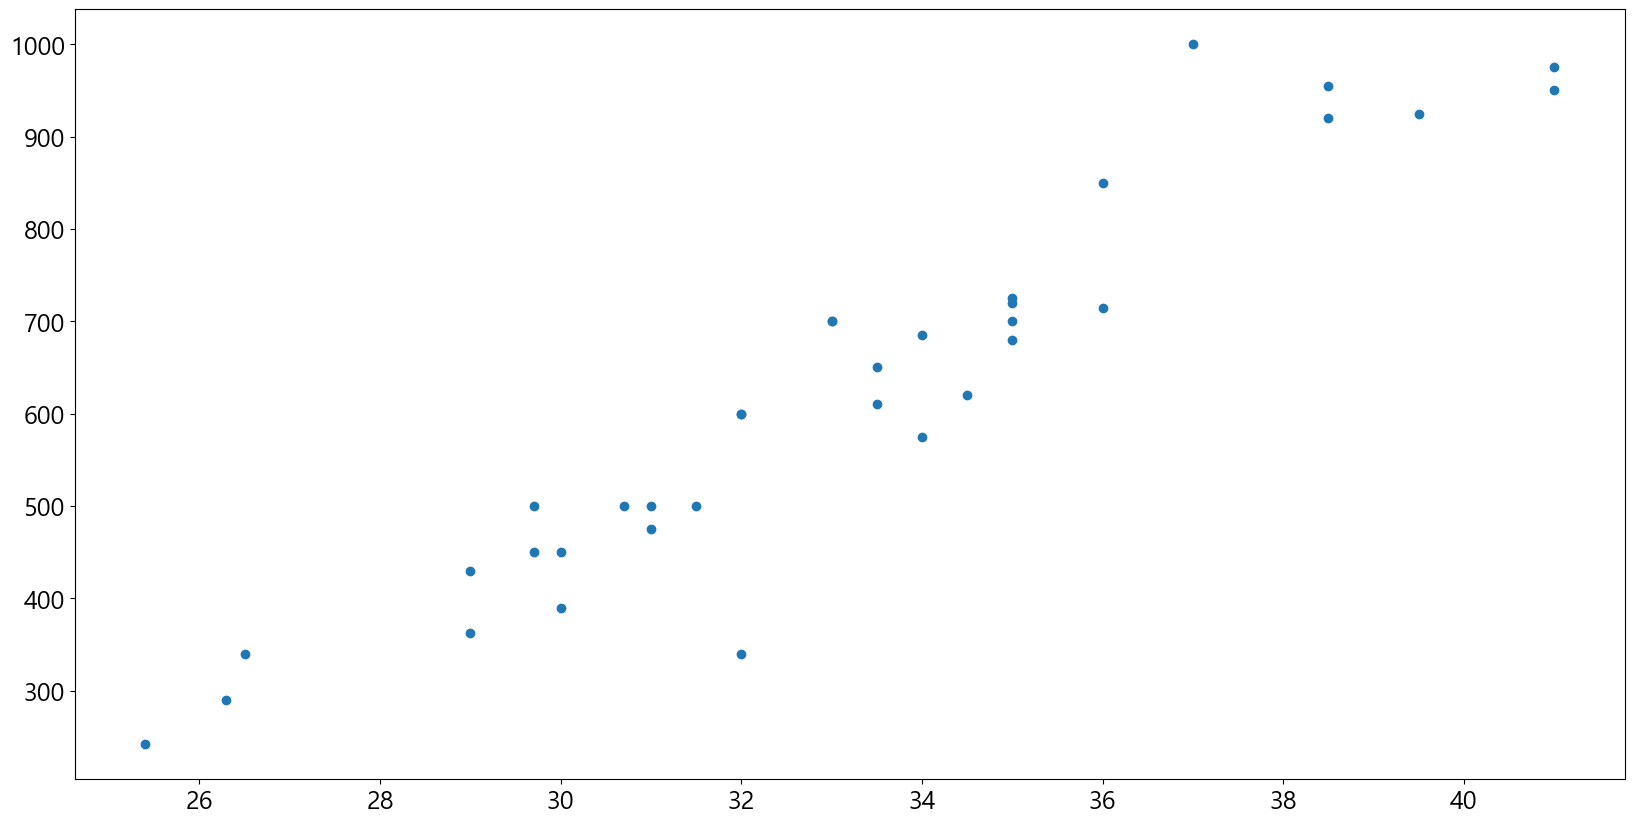

In [46]:
# 시각화를 통해데이터 특징 분포 확인하기 (선형 or 비선형)
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)
plt.scatter(bream_length,brean_weight)
plt.show()

In [48]:
# 데이터 가지고 오기

# 2. 빙어 데이터
# 빙어 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 빙어 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

print('도미 길이 :', smelt_length)
print('-------------------------------------------------------------------------------------------------------------------------')
print('도미 무게 :', smelt_weight)
print()
print(len(smelt_length), len(smelt_weight))

도미 길이 : [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
-------------------------------------------------------------------------------------------------------------------------
도미 무게 : [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

14 14


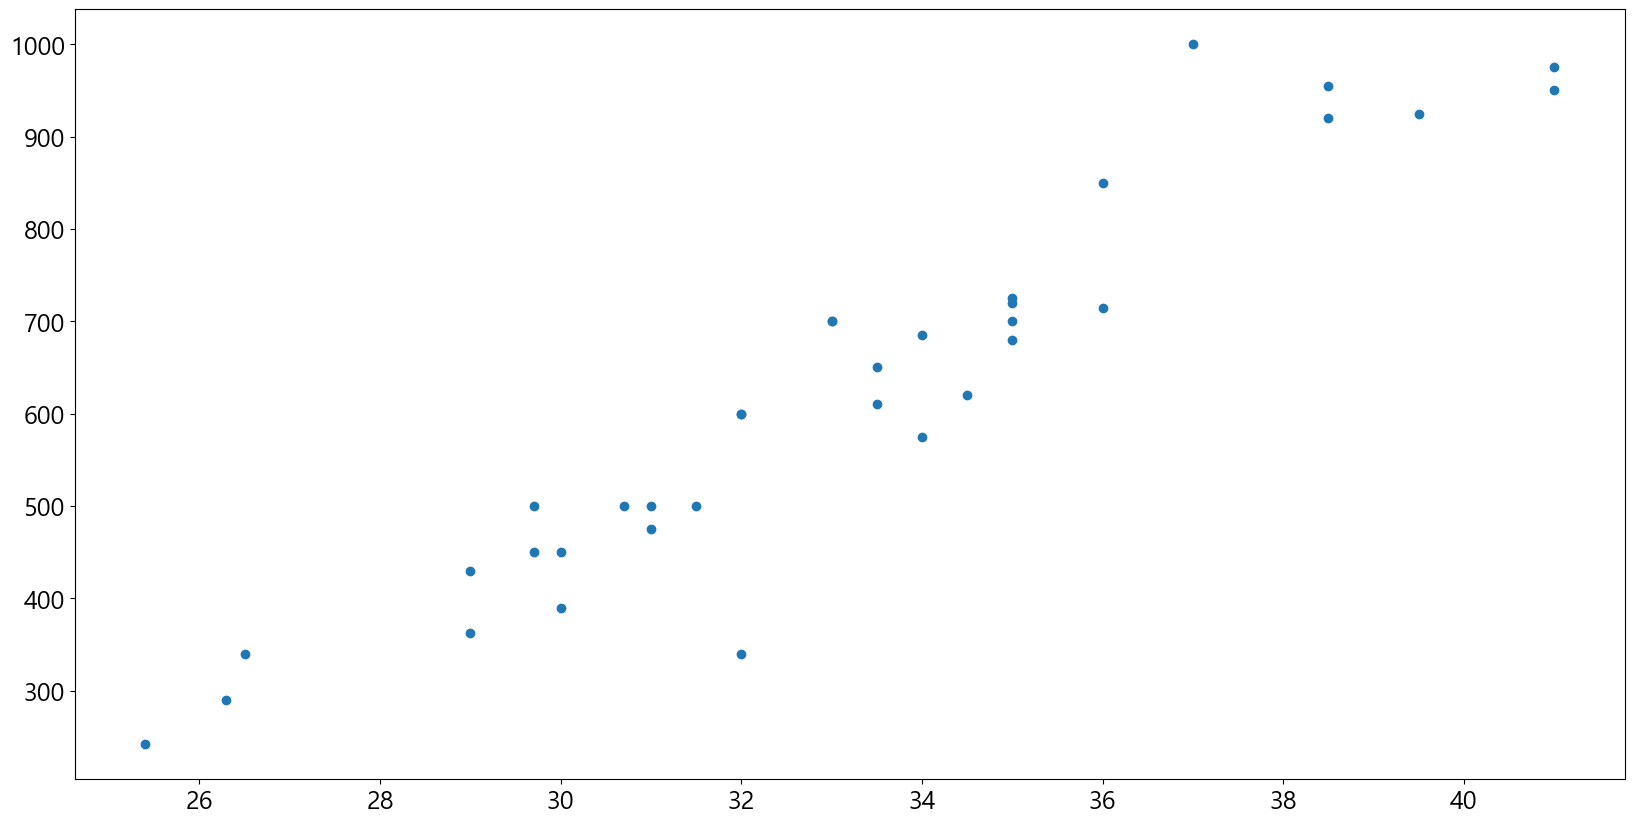

In [49]:
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)
plt.scatter(bream_length,brean_weight)
plt.show()

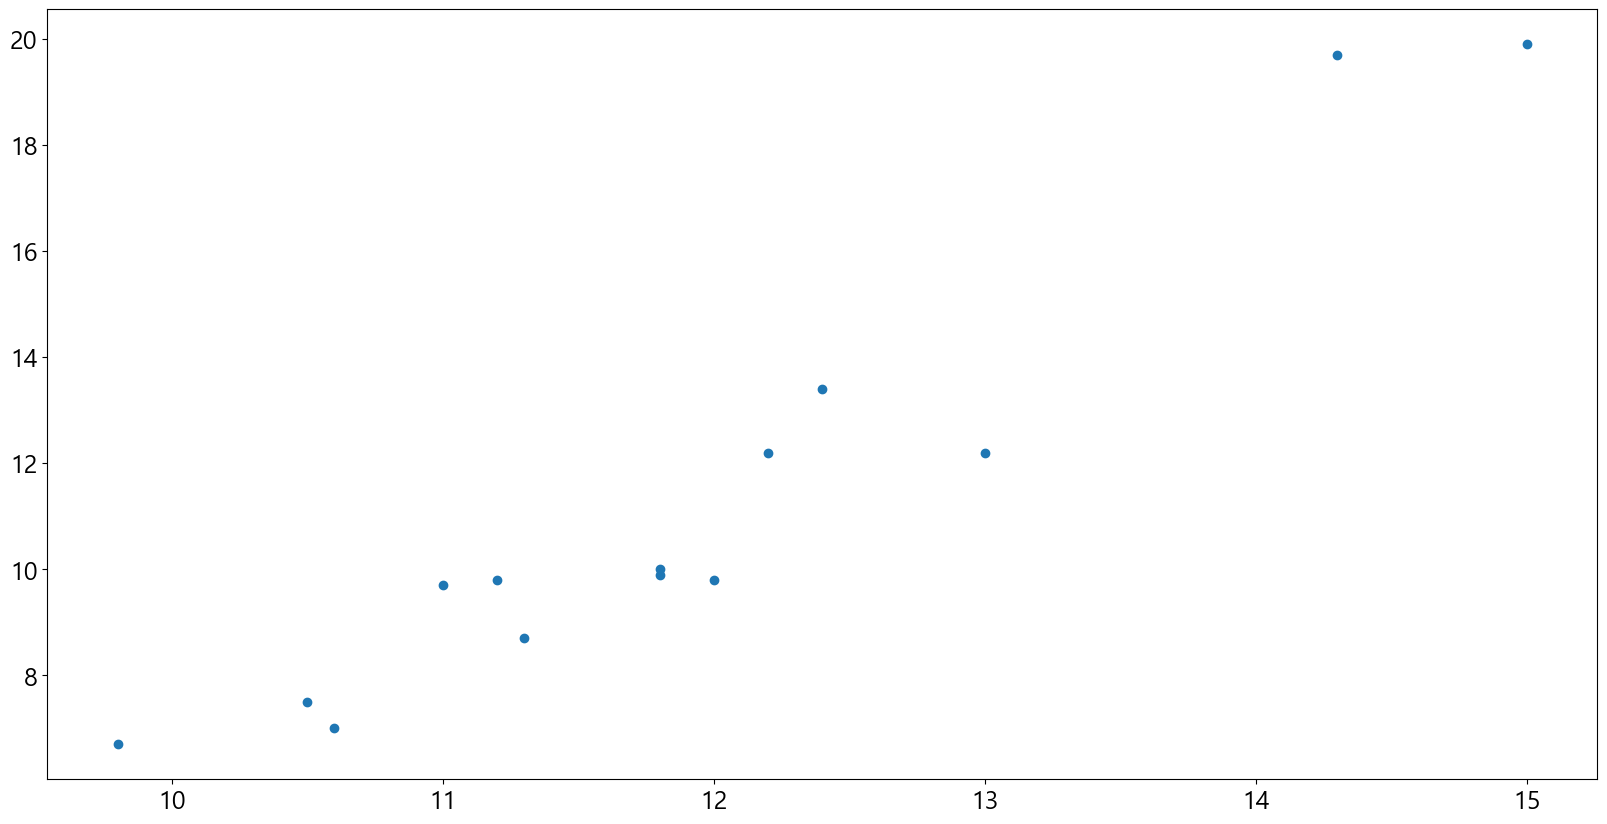

In [50]:
# 시각화를 통해데이터 특징 분포 확인하기 (선형 or 비선형)
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)
plt.scatter(smelt_length,smelt_weight)
plt.show()

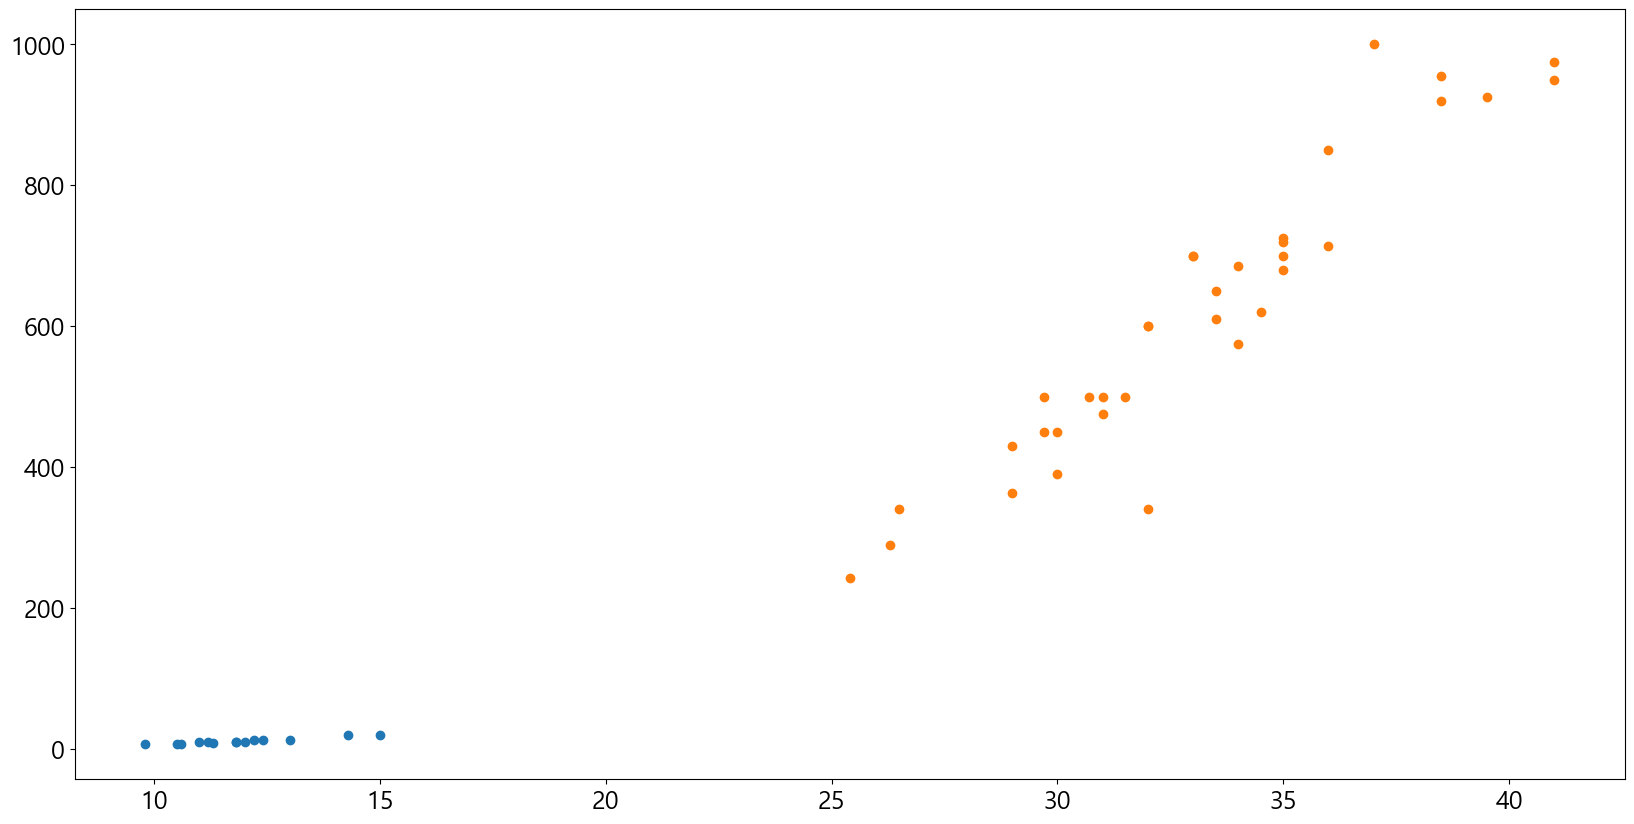

In [51]:
# 시각화를 통해데이터 특징 분포 확인하기 (선형 or 비선형)
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(bream_length,brean_weight)
plt.show()

# 해석
# 주황색 : 도미
# 파랑색 : 빙어
# 도미와 빙어는 길이에 비례해서 무게가 증가하는 것으로 보임
# 다만, 빙어의 경우, 길이에 비례해서 크게 무게가 증가되지는 않는다.
# 빙어는 무게에 비해 길이의 영향을 덜 받는것으로 보인다.

### 머신러닝 프로그래밍
- 첫번째 모델 : 가장 간단한 모델 사용(분류와 회귀가 가능한 모델)
- K-최근접 이웃(K-Nearest Neighbors, KNN) 알고리즘 사용
- 도미와 빙어 데이터를 통해 패턴을 찾아서 알고리즘 완성
- 완성된 알고리즘으로 예측

In [55]:
lenght = bream_length + smelt_length
weight = brean_weight + smelt_weight

In [61]:
print(len(lenght))
print(len(weight))

49
49


In [ ]:
# 길이와 무게를 하나의 데이터 세트로 만들기
# scikit-learn 2차원 데이터 세트 사용
# [[길이,무게],[길이,무게]]

In [65]:
fish_data = []
for i in range(len(lenght)):
    fish_data.append([lenght[i],weight[i]])

In [75]:
len(fish_data)

49

In [85]:
# 리스트 내포 프로그램 : list compre hension
# zip() : 각각의 리스트 안에서 각 인덱스의 쌍을 반환해준다
fish_data = [[leng, wei] for leng,wei in zip(lenght,weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [89]:
# 정답 데이터 생성(종속변수 y)
    # 변수명 : fish_target
    # 형태 : 1차원 ex) [1,1,1...0,0,0]
    # - 정답 변수는 1차원 리스트로 별도로 생성
    # - 정답 변수의 갯수는 독립변수의 갯수와 동일
    # - 도미 : 1, 빙어 : 0

In [95]:
fish_target = []
for i in range(len(fish_data)):
    if i <= 35:
        fish_target.append(1)
    else :
        fish_target.append(0)
len(fish_target)

49

In [110]:
fish_target=[1]*35+[0]*14

In [113]:
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [121]:
# 머신러닝 실행하기
# 알고리즘 : k-최근접 이웃 알고리즘(KNN)
# 사용패키지 : sklearn (사이킷런)
# 사용클래스(모델) :KNeighborsClassifier

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
# Class 객체 생성하기 : 주소 받아오기
# 객체 변수 : kn
# Class 생성자 호출
kn = KNeighborsClassifier()
kn

KNeighborsClassifier()

In [125]:
# 모델 학습하기(훈련(training))
# 훈련모델 생성하기(fit(독립변수 데이터세트, 종속변수 데이터세트)
# - 학습모델 - 훈련모델
# - 독립변수(훈련 데이터세트) - 훈련
# - 사용되는 훈련데이터 변수명 : train_x | train_data
# - 사용되는 정답데이터 변수명 : train_y | train_target
# - 사용되는 테스트데이터 변수명 : test_x | test_data
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [130]:
# 훈련모델 평가하기
# 훈련 점수로 훈련 성과 표현
# 결과값 : 정확도
# score 내부 실행 순서
# predict() 에측 수행
# 정확도 계산 값 반환
    # -정확도 = 정답갯수 / 전체갯수
# 결과값읜 0~1 사이의 실수값 | 정수값
# 1 = 100%, 0.5 = 50%, 0 = 0%
# 1에 가까울 수록 정확도가 높다
# 다른 모델에서는 정확도를 accuracy 라는 이름으로도 조회
kn.score(fish_data, fish_target)

1.0

### K-최근접 이웃 알고리즘
#### 주의의 데이터로 현재 예측 데이터를 판단
- 어떤 데이터에 대한 답을 구할 때, 
- 주위의 다른 데이터를 보고,
- 다수를 차지하는 쪽으로 정답을 예측

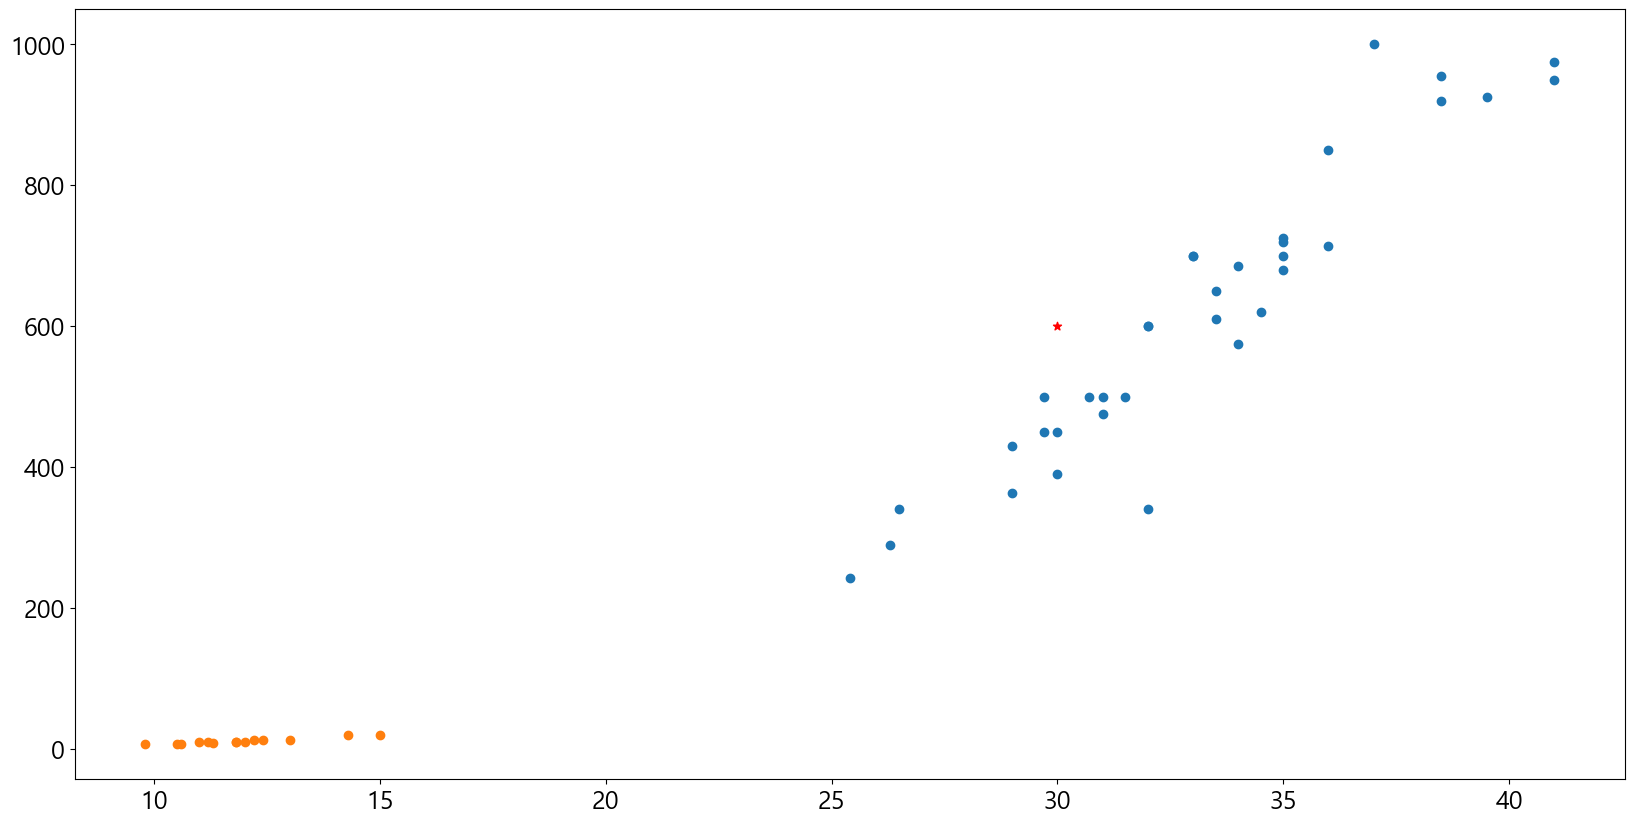

In [134]:
# 시각화를 통해데이터 특징 분포 확인하기 (선형 or 비선형)
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)

plt.scatter(bream_length,brean_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(30, 600, marker='*', c='red')
plt.show()

# 해석
# 파랑색 : 도미
# 주황색 : 빙어
# 도미와 빙어는 길이에 비례해서 무게가 증가하는 것으로 보임
# 다만, 빙어의 경우, 길이에 비례해서 크게 무게가 증가되지는 않는다.
# 빙어는 무게에 비해 길이의 영향을 덜 받는것으로 보인다.

In [137]:
# 새로운 데이터 예측하기(predict())
# predict()함수에 사용되는 값은 새로운 독리변수로 사용
    #- 사용되는 값 1개
    # 사용된 값의 예측값(정답)출력

In [151]:
kn.predict([[30,600]])

array([1])

In [153]:
# KNN 알고리즘 -> 데이터만 잘 준비해서 저장
# 클래스(모델) 내부의 멤버 변수에 전체 데이터가 저장되어있다.
    # - 전체데이터 = 독립변수, 종속변수 각각 변수에 저장
    # - 예측데이터(독립변수) 입력시 모델의 전체 데이터에서 
    #    가장 가까운거리의 종속변수 출력
# (단점)데이터가 많은경우 CPU, RAM 사양이 중요

In [159]:
# 모델 내부 데이터 확인

# 모델 내부의 훈련 데이터
kn._fit_X

# 모델 내부의 정답 데이터
kn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [161]:
# 최근접 이웃 기준치(n_neighbors)
# 기본값 = 5 (n_neighbors = 5)
# 클래스(모델) 생성시에 기준갯수 지정
# 지정된 갯수를 이용하여 훈련, 예측

In [160]:
# 이웃의 갯수 20개를 기준으로 지정 후 예측
kn20 = KNeighborsClassifier(n_neighbors=20)
kn20

KNeighborsClassifier(n_neighbors=20)

In [162]:
kn20.fit(fish_data,fish_target)

KNeighborsClassifier(n_neighbors=20)

In [165]:
round(kn20.score(fish_data,fish_target),2)

0.98

In [164]:
kn20.predict([[30,600]])

array([1])

In [166]:
# 이웃의 갯수 49개를 기준으로 지정 후 예측
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49

KNeighborsClassifier(n_neighbors=49)

In [167]:
kn49.fit(fish_data,fish_target)

KNeighborsClassifier(n_neighbors=49)

In [170]:
round(kn49.score(fish_data,fish_target),2)

0.71

In [171]:
kn49.predict([[30,600]])

array([1])

In [ ]:
# [문제]
# 가장 적합한 n_neighbor 갯수 찾기
# 1보다 작아지기 전까지의 갯수 값 찾기

In [207]:
kn_test = KNeighborsClassifier()
kn_test.fit(fish_data,fish_target)
nCnt = 0

for n in range(1,len(fish_data)+1):
    kn_test.n_neighbors=n
    test_score = kn_test.score(fish_data,fish_target)
    if test_score < 1 :
        nCnt = n - 1
        print('nCnt:', nCnt)
        break

nCnt: 17
